### Logistic Regression: Submarine 

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### read the Dataset

In [5]:
df = pd.read_csv('submarin dataset.csv')
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [8]:
df['R'].value_counts()
#M===> Mine
#R===> Rock

R
M    111
R     96
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [12]:
df.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

### Seperate X and Y

In [13]:
x= df.drop(columns=['R'],axis=1)
y= df[['R']]

In [14]:
x.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [15]:
y.head()

,R
0,R
1,R
2,R
3,R
4,R


### LAbel encoding on targeted column

In [16]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y['R']= le.fit_transform(y['R'])

In [19]:
y['R'].value_counts()
# 0 ==> R (Rock)
# 1 ==> M (Mine)

R
0    111
1     96
Name: count, dtype: int64

### Preprocessing of X features

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [21]:
num_pipe= Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler())])

In [22]:
x_pre = num_pipe.fit_transform(x)
x_pre

array([[ 0.70018948,  0.42042142,  1.0529498 , ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [-0.13089402,  0.59942737,  1.71912994, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.83579208, -0.64754631,  0.48045125, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 1.00042384,  0.15949749, -0.67235266, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [ 0.0475061 , -0.09535845,  0.13434985, ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.13959647, -0.06501846, -0.78685237, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

In [23]:
cols= num_pipe.get_feature_names_out()

In [24]:
cols

array(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986',
       '0.1539', '0.1601', '0.3109', '0.2111', '0.1609', '0.1582',
       '0.2238', '0.0645', '0.0660', '0.2273', '0.3100', '0.2999',
       '0.5078', '0.4797', '0.5783', '0.5071', '0.4328', '0.5550',
       '0.6711', '0.6415', '0.7104', '0.8080', '0.6791', '0.3857',
       '0.1307', '0.2604', '0.5121', '0.7547', '0.8537', '0.8507',
       '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343',
       '0.0383', '0.0324', '0.0232', '0.0027', '0.0065', '0.0159',
       '0.0072', '0.0167', '0.0180', '0.0084', '0.0090', '0.0032'],
      dtype=object)

In [25]:
x_pre = pd.DataFrame(x_pre, columns=cols)
x_pre

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.700189,0.420421,1.052950,0.319501,0.777810,2.600518,1.522475,2.506911,1.324632,0.587392,...,-0.294569,-0.528057,-0.259343,-0.838780,0.014044,1.913786,1.084838,-0.470938,-0.442688,-0.422461
1,-0.130894,0.599427,1.719130,1.167351,0.401466,2.087862,1.967839,2.847551,3.240336,3.058831,...,-1.061350,1.012809,0.832198,-0.194293,1.227682,2.842696,4.150049,1.306561,0.252998,0.254053
2,-0.835792,-0.647546,0.480451,-0.722021,-0.983262,-1.147115,-0.190961,-0.083126,-0.996071,-0.608898,...,0.672242,-0.142840,-1.010664,0.559893,-0.112965,-0.154353,-0.482599,-0.548221,-0.636834,1.030055
3,2.044717,0.854283,0.110929,-0.315311,-0.289998,-0.671681,-0.011196,1.315846,1.516965,1.768058,...,-0.036197,-1.079853,-0.755498,-0.057168,0.239837,-1.170895,-0.099448,-0.486395,0.447143,0.572413
4,-0.026465,0.208041,-0.419933,-0.788730,-0.660939,-0.094732,-0.024152,0.571138,0.280782,0.711633,...,-0.469595,-0.934096,-1.322533,-0.975905,-1.129034,0.126073,-0.360687,-0.810982,-0.458867,-0.064306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.457236,-0.116596,-0.703580,-0.782275,-0.644733,0.988106,1.315179,0.407865,0.469725,0.447527,...,0.355528,-0.194897,-0.131760,1.231805,-0.846792,0.336392,-0.221359,0.549192,1.838517,1.825954
203,0.134531,-0.859926,-0.365285,0.050513,0.016119,-0.148874,-0.365867,-0.386178,-0.630046,0.053227,...,-0.911327,-0.767516,-0.202639,0.354206,-0.423430,-0.329619,-0.761255,-0.733699,-0.280901,0.035181
204,1.000424,0.159497,-0.672353,-0.534806,-0.720362,0.211508,0.066541,-0.198238,-0.436866,0.332213,...,-0.044532,0.263199,-1.109895,-0.797643,-0.437542,0.126073,1.084838,0.904691,-0.038219,-0.681128
205,0.047506,-0.095358,0.134350,0.145196,-1.051689,0.521132,0.403398,-0.262842,0.145217,0.202020,...,-0.986338,-0.507234,-0.868905,0.230794,-0.804456,-0.820363,-0.761255,-0.007243,-0.701549,-0.342871


### Seperating Training and Testing Data

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre, y, test_size= 0.3 , random_state= 56)

In [27]:
xtrain.shape

(144, 60)

In [28]:
xtest.shape

(63, 60)

In [29]:
ytrain.shape

(144, 1)

In [30]:
ytest.shape

(63, 1)

### Create Logistic Regression model

In [31]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain,ytrain)

LogisticRegression()

In [33]:
lg.intercept_

array([-0.77242845])

In [34]:
lg.coef_

array([[-0.88067371, -0.41044473,  0.25194464, -0.30620654, -0.17561912,
         0.20873231,  0.45546867,  0.76101139, -0.47415128, -0.80249647,
        -0.81812899, -0.8084618 , -0.20340473,  0.32856221, -0.08673175,
         0.58578244,  0.50438518, -0.04559453, -0.06834638, -0.8985793 ,
        -0.34179421, -0.14158888, -0.4786343 , -0.49564263,  0.35492114,
         0.04936126, -0.25081928, -0.06707584, -0.45616985, -0.39641798,
         1.33160989, -0.14434707, -0.13264316,  0.26392916,  0.12653681,
         0.76910617,  0.50352414,  0.13465413, -0.19030999,  0.35526761,
         0.13012451, -0.19988226, -0.49131882, -0.84974149, -0.54703311,
        -0.07342104,  0.26588774, -0.36579832, -1.06454425,  0.60228457,
        -0.86136863, -0.39430173,  0.22428368, -0.58590287,  0.57481533,
        -0.48954879,  0.58902049,  0.13913323, -0.15896169,  0.53547571]])

### Predict training and testing data

In [35]:
ypred_tr= lg.predict(xtrain)
ypred_tr

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1])

In [37]:
ytrain.head()

,R
70,1
130,0
202,0
120,0
134,0


In [38]:
ypred_ts= lg.predict(xtest)
ypred_ts

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [40]:
ytest.head()

,R
99,0
92,1
63,1
45,1
68,1


In [41]:
lg.score(xtrain,ypred_tr)

1.0

In [42]:
lg.score(xtest,ypred_ts)

1.0

In [43]:
from sklearn.metrics import accuracy_score
tr_acc= accuracy_score(ytrain,ypred_tr)
ts_acc= accuracy_score(ytest,ypred_ts)

In [50]:
print(f'training accuracy ={tr_acc}')
      
print(f'testing accuracy = {ts_acc}')

training accuracy =0.9583333333333334
testing accuracy = 0.7619047619047619


### Confusion metrics for test Data

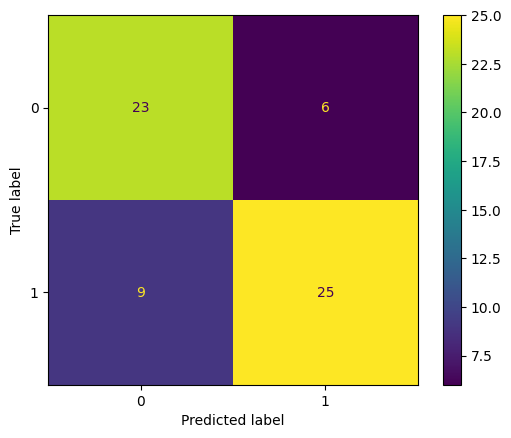

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=lg.classes_)
cfd.plot()

In [52]:
# Acuuracy
(23+25)/(23+25+6+9)

0.7619047619047619

### Print classification report

In [53]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.81      0.74      0.77        34

    accuracy                           0.76        63
   macro avg       0.76      0.76      0.76        63
weighted avg       0.77      0.76      0.76        63



In [55]:
lg.predict_proba(xtest)

array([[9.39372702e-01, 6.06272982e-02],
       [7.38094471e-01, 2.61905529e-01],
       [3.63404114e-05, 9.99963660e-01],
       [7.45832682e-01, 2.54167318e-01],
       [7.09708271e-03, 9.92902917e-01],
       [9.21018230e-01, 7.89817697e-02],
       [6.23803581e-05, 9.99937620e-01],
       [9.98145699e-01, 1.85430132e-03],
       [1.15961054e-02, 9.88403895e-01],
       [8.67646787e-01, 1.32353213e-01],
       [5.57426205e-02, 9.44257379e-01],
       [9.89557799e-01, 1.04422008e-02],
       [8.86975330e-05, 9.99911302e-01],
       [3.36647688e-01, 6.63352312e-01],
       [2.04756511e-03, 9.97952435e-01],
       [9.45010465e-01, 5.49895354e-02],
       [5.66489158e-02, 9.43351084e-01],
       [9.76659940e-01, 2.33400598e-02],
       [6.60678555e-01, 3.39321445e-01],
       [7.78660839e-02, 9.22133916e-01],
       [2.43910370e-01, 7.56089630e-01],
       [4.57207945e-02, 9.54279205e-01],
       [6.83369604e-01, 3.16630396e-01],
       [9.99999697e-01, 3.02538876e-07],
       [5.769580

In [56]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb= le.inverse_transform(ypred_ts)

In [57]:
ypred_tr_lb

array(['R', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R',
       'M', 'M', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R',
       'R', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'M', 'M', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'R', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M', 'M',
       'M', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M', 'R',
       'M', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'M',
       'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'M',
       'R'], dtype=object)

In [58]:
ypred_ts_lb

array(['M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R',
       'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R',
       'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'M', 'R', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M'],
      dtype=object)